### Packages

In [112]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

### Load Data

In [4]:
import pandas as pd

In [5]:
train = pd.read_csv('data/bike-sharing/train.csv')

print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
test = pd.read_csv('data/bike-sharing/test.csv')

print(test.shape)
test.head()

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


### EDA (Exploratory Data Analysis)

In [7]:
import seaborn as sns

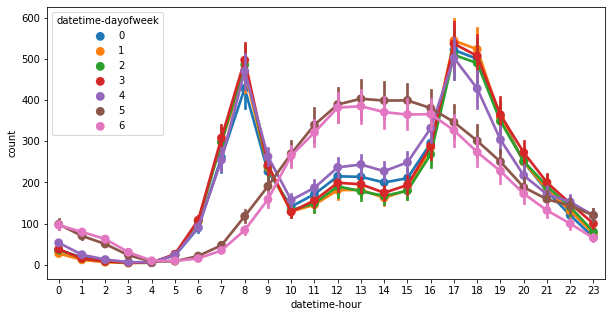

In [133]:
plt.figure(figsize=(10, 5))
sns.pointplot(data=train, x='datetime-hour', y='count', hue='datetime-dayofweek')
plt.show()

In [131]:
train['datetime-dayofweek'] = train['datetime'].dt.dayofweek

print(train.shape)
train.head()

(10886, 29)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,season_1,season_2,season_3,season_4,windspeed_new,windspeed_interval,windspeed_new2,season_new,datetime-yearmonth,datetime-dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,...,True,False,False,False,6.0032,0.0,False,4.0,2011-1,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,...,True,False,False,False,6.0032,0.0,False,4.0,2011-1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,...,True,False,False,False,6.0032,0.0,False,4.0,2011-1,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,...,True,False,False,False,6.0032,0.0,False,4.0,2011-1,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,...,True,False,False,False,6.0032,0.0,False,4.0,2011-1,5


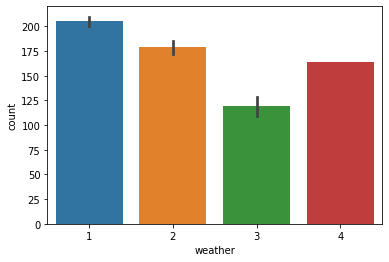

In [16]:
sns.barplot(data=train, x='weather', y='count')

In [17]:
train[train['weather'] == 4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,index,season_1,season_2,season_3,season_4
5631,2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86,6.0032,6,...,1,9,18,0,0,47.62548,True,False,False,False


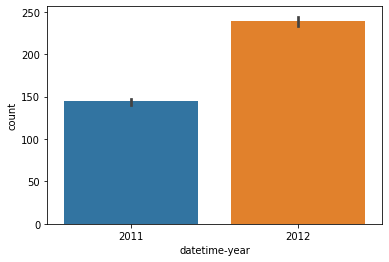

In [103]:
sns.barplot(data=train, x='datetime-year', y='count')

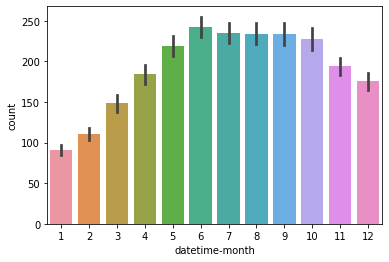

In [102]:
sns.barplot(data=train, x='datetime-month', y='count')

In [ ]:
train['datetime-yearmonth'] = train['datetime-year'].astype(str) + '-' + train['datetime-month'].astype(str)

train.head()

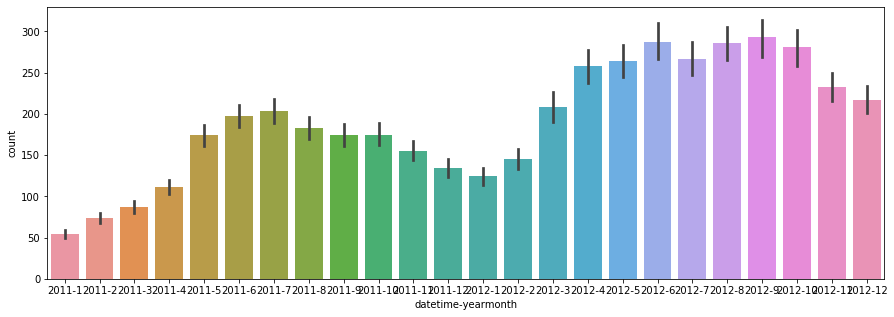

In [114]:
plt.figure(figsize=(15, 5))
sns.barplot(data=train, x='datetime-yearmonth', y='count')
plt.show()

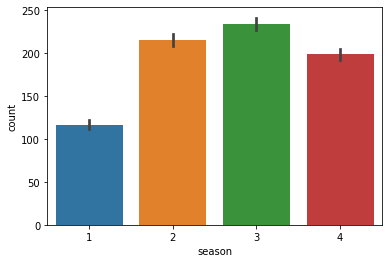

In [18]:
sns.barplot(data=train, x='season', y='count')

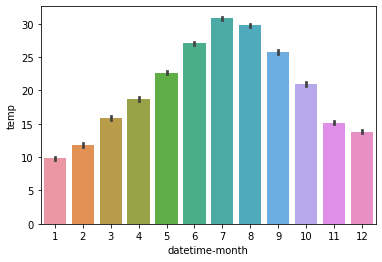

In [82]:
## 6, 7, 8, 9 - 여름
## 3, 4, 5 - 봄
## 10, 11 - 가을
## 1, 2, 12 - 겨울
sns.barplot(data=train, x='datetime-month', y='temp')

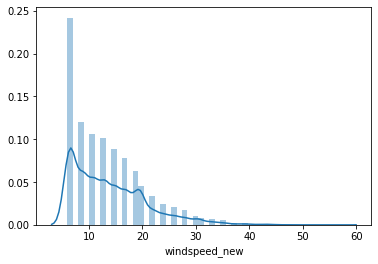

In [58]:
# sns.distplot(train['windspeed'])
sns.distplot(train['windspeed_new'])

In [ ]:
for v1, v2 in zip(train['datetime'], train['windspeed_new']):
    print(v1, v2)

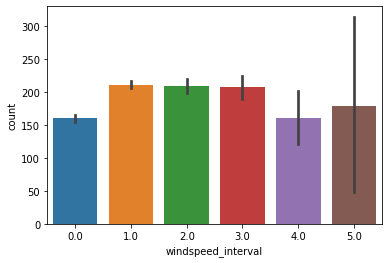

In [65]:
sns.barplot(data=train, x='windspeed_interval', y='count')

### Preprocessing

In [134]:
train['datetime'] = pd.to_datetime(train['datetime'])

train['datetime-year'] = train['datetime'].dt.year
train['datetime-month'] = train['datetime'].dt.month
train['datetime-day'] = train['datetime'].dt.day
train['datetime-hour'] = train['datetime'].dt.hour
train['datetime-minute'] = train['datetime'].dt.minute
train['datetime-second'] = train['datetime'].dt.second

train['datetime-dayofweek'] = train['datetime'].dt.dayofweek

print(train.shape)
train.head()

(10886, 29)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,season_1,season_2,season_3,season_4,windspeed_new,windspeed_interval,windspeed_new2,season_new,datetime-yearmonth,datetime-dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,...,True,False,False,False,6.0032,0.0,False,4.0,2011-1,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,...,True,False,False,False,6.0032,0.0,False,4.0,2011-1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,...,True,False,False,False,6.0032,0.0,False,4.0,2011-1,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,...,True,False,False,False,6.0032,0.0,False,4.0,2011-1,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,...,True,False,False,False,6.0032,0.0,False,4.0,2011-1,5


In [135]:
test['datetime'] = pd.to_datetime(test['datetime'])

test['datetime-year'] = test['datetime'].dt.year
test['datetime-month'] = test['datetime'].dt.month
test['datetime-day'] = test['datetime'].dt.day
test['datetime-hour'] = test['datetime'].dt.hour
test['datetime-minute'] = test['datetime'].dt.minute
test['datetime-second'] = test['datetime'].dt.second

test['datetime-dayofweek'] = test['datetime'].dt.dayofweek

print(test.shape)
test.head()

(6493, 25)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,...,index,season_1,season_2,season_3,season_4,windspeed_new,windspeed_interval,windspeed_new2,season_new,datetime-dayofweek
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,...,52.836504,True,False,False,False,26.0027,2.0,True,4.0,3
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,...,52.836504,True,False,False,False,11.0014,1.0,False,4.0,3
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,...,52.836504,True,False,False,False,11.0014,1.0,False,4.0,3
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,...,52.836504,True,False,False,False,11.0014,1.0,False,4.0,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,...,52.836504,True,False,False,False,11.0014,1.0,False,4.0,3


In [11]:
# 9/5 * T - 0.55 * (1 - RH) * (9/5 * T - 26) + 32

train['index'] = 9/5 * train['temp'] - 0.55 * (1 - train['humidity']/100) * \
                (9/5 * train['temp'] - 26) + 32

print(train.shape)
train.head()

(10886, 19)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,index
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,50.578096
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,49.310040
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,49.310040
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,50.851600
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,50.851600


In [12]:
test['index'] = 9/5 * test['temp'] - 0.55 * (1 - test['humidity']/100) * \
                (9/5 * test['temp'] - 26) + 32

print(test.shape)
test.head()

(6493, 16)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,index
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,0,0,52.836504
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,0,0,52.836504
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,0,0,52.836504
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,0,0,52.836504
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,0,0,52.836504


In [13]:
# one-hot encoding
train['season_1'] = train['season'] == 1
train['season_2'] = train['season'] == 2
train['season_3'] = train['season'] == 3
train['season_4'] = train['season'] == 4

print(train.shape)
train[['season','season_1', 'season_2', 'season_3','season_4']].tail()

(10886, 23)


,season,season_1,season_2,season_3,season_4
10881,4,False,False,False,True
10882,4,False,False,False,True
10883,4,False,False,False,True
10884,4,False,False,False,True
10885,4,False,False,False,True


In [14]:
test['season_1'] = test['season'] == 1
test['season_2'] = test['season'] == 2
test['season_3'] = test['season'] == 3
test['season_4'] = test['season'] == 4

print(test.shape)
test.head()

(6493, 20)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,index,season_1,season_2,season_3,season_4
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,0,0,52.836504,True,False,False,False
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,0,0,52.836504,True,False,False,False
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,0,0,52.836504,True,False,False,False
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,0,0,52.836504,True,False,False,False
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,0,0,52.836504,True,False,False,False


In [40]:
train['windspeed_new'] = train['windspeed'].replace(0, np.nan)
train['windspeed_new'] = train['windspeed_new'].fillna(method='backfill')

print(train.shape)
train.head()

(10886, 24)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,datetime-day,datetime-hour,datetime-minute,datetime-second,index,season_1,season_2,season_3,season_4,windspeed_new
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,...,1,0,0,0,50.578096,True,False,False,False,6.0032
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,...,1,1,0,0,49.310040,True,False,False,False,6.0032
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,...,1,2,0,0,49.310040,True,False,False,False,6.0032
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,...,1,3,0,0,50.851600,True,False,False,False,6.0032
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,...,1,4,0,0,50.851600,True,False,False,False,6.0032


In [46]:
test['windspeed_new'] = test['windspeed'].replace(0, np.nan)
test['windspeed_new'] = test['windspeed_new'].fillna(method='backfill')

print(test.shape)
test.head()

(6493, 21)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,...,datetime-day,datetime-hour,datetime-minute,datetime-second,index,season_1,season_2,season_3,season_4,windspeed_new
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,...,20,0,0,0,52.836504,True,False,False,False,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,...,20,1,0,0,52.836504,True,False,False,False,11.0014
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,...,20,2,0,0,52.836504,True,False,False,False,11.0014
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,...,20,3,0,0,52.836504,True,False,False,False,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,...,20,4,0,0,52.836504,True,False,False,False,11.0014


In [68]:
train['windspeed_interval'] = train['windspeed_new'] // 10
train['windspeed_new2'] = train['windspeed_interval'].isin([2, 3, 4])

print(train.shape)
train[['windspeed_new', 'windspeed_interval', 'windspeed_new2']].head()

(10886, 26)


,windspeed_new,windspeed_interval,windspeed_new2
0,6.0032,0.0,False
1,6.0032,0.0,False
2,6.0032,0.0,False
3,6.0032,0.0,False
4,6.0032,0.0,False


In [69]:
test['windspeed_interval'] = test['windspeed_new'] // 10
test['windspeed_new2'] = test['windspeed_interval'].isin([2, 3, 4])

print(test.shape)
test[['windspeed_new', 'windspeed_interval', 'windspeed_new2']].head()

(6493, 23)


,windspeed_new,windspeed_interval,windspeed_new2
0,26.0027,2.0,True
1,11.0014,1.0,False
2,11.0014,1.0,False
3,11.0014,1.0,False
4,11.0014,1.0,False


In [89]:
## 6, 7, 8, 9 - 여름
## 3, 4, 5 - 봄
## 10, 11 - 가을
## 1, 2, 12 - 겨울

train.loc[train['datetime-month'].isin([3, 4, 5]), 'season_new'] = 1
train.loc[train['datetime-month'].isin([6, 7, 8, 9]), 'season_new'] = 2
train.loc[train['datetime-month'].isin([10, 11]), 'season_new'] = 3
train.loc[train['datetime-month'].isin([1, 2, 12]), 'season_new'] = 4

print(train.shape)
train.head()

(10886, 27)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,datetime-second,index,season_1,season_2,season_3,season_4,windspeed_new,windspeed_interval,windspeed_new2,season_new
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,...,0,50.578096,True,False,False,False,6.0032,0.0,False,4.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,...,0,49.310040,True,False,False,False,6.0032,0.0,False,4.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,...,0,49.310040,True,False,False,False,6.0032,0.0,False,4.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,...,0,50.851600,True,False,False,False,6.0032,0.0,False,4.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,...,0,50.851600,True,False,False,False,6.0032,0.0,False,4.0


In [90]:
test.loc[train['datetime-month'].isin([3, 4, 5]), 'season_new'] = 1
test.loc[train['datetime-month'].isin([6, 7, 8, 9]), 'season_new'] = 2
test.loc[train['datetime-month'].isin([10, 11]), 'season_new'] = 3
test.loc[train['datetime-month'].isin([1, 2, 12]), 'season_new'] = 4

print(test.shape)
test.head()

(6493, 24)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,...,datetime-second,index,season_1,season_2,season_3,season_4,windspeed_new,windspeed_interval,windspeed_new2,season_new
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,...,0,52.836504,True,False,False,False,26.0027,2.0,True,4.0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,...,0,52.836504,True,False,False,False,11.0014,1.0,False,4.0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,...,0,52.836504,True,False,False,False,11.0014,1.0,False,4.0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,...,0,52.836504,True,False,False,False,11.0014,1.0,False,4.0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,...,0,52.836504,True,False,False,False,11.0014,1.0,False,4.0


### Model

In [41]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
train.columns

In [140]:
feature_names = ['season', 'holiday', 'workingday', 'weather',
                 'temp', 'atemp', 'humidity', 'windspeed_new2',
                 'datetime-year', 'datetime-hour', 'datetime-dayofweek',
                 'index']

len(feature_names)

12

In [141]:
X_train = train[feature_names]

print(X_train.shape)
X_train.head()

(10886, 12)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed_new2,datetime-year,datetime-hour,datetime-dayofweek,index
0,1,0,0,1,9.84,14.395,81,False,2011,0,5,50.578096
1,1,0,0,1,9.02,13.635,80,False,2011,1,5,49.310040
2,1,0,0,1,9.02,13.635,80,False,2011,2,5,49.310040
3,1,0,0,1,9.84,14.395,75,False,2011,3,5,50.851600
4,1,0,0,1,9.84,14.395,75,False,2011,4,5,50.851600


In [142]:
X_test = test[feature_names]

print(X_test.shape)
X_test.head()

(6493, 12)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed_new2,datetime-year,datetime-hour,datetime-dayofweek,index
0,1,0,1,1,10.66,11.365,56,True,2011,0,3,52.836504
1,1,0,1,1,10.66,13.635,56,False,2011,1,3,52.836504
2,1,0,1,1,10.66,13.635,56,False,2011,2,3,52.836504
3,1,0,1,1,10.66,12.880,56,False,2011,3,3,52.836504
4,1,0,1,1,10.66,12.880,56,False,2011,4,3,52.836504


In [143]:
label = 'count'

In [144]:
y_train = train[label]

print(y_train.shape)
y_train.head()

(10886,)


0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

#### Training

In [145]:
# model = DecisionTreeClassifier(random_state=100)
# model = DecisionTreeRegressor(random_state=100)
model = RandomForestRegressor(random_state=37)

model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators='warn',
                      n_jobs=None, oob_score=False, random_state=37, verbose=0,
                      warm_start=False)

In [146]:
model.fit(X_train, y_train)

/Users/hyunjung/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=37, verbose=0,
                      warm_start=False)

#### Prediction

In [147]:
prediction = model.predict(X_test)

prediction[:5]

array([9.6, 4. , 3.9, 3.8, 2.6])

### Submission

In [148]:
submission = pd.read_csv('data/bike-sharing/submission.csv')

print(submission.shape)
submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,8.838999
1,2011-01-20 01:00:00,5.056628
2,2011-01-20 02:00:00,2.619220
3,2011-01-20 03:00:00,1.827078
4,2011-01-20 04:00:00,1.765346


In [149]:
submission[label] = prediction

submission.head()

,datetime,count
0,2011-01-20 00:00:00,9.6
1,2011-01-20 01:00:00,4.0
2,2011-01-20 02:00:00,3.9
3,2011-01-20 03:00:00,3.8
4,2011-01-20 04:00:00,2.6


In [151]:
submission.to_csv('data/bike-sharing/dayofweek.csv', index=False)